# Moving Average Model Activity

Time series analysis is a crucial tool in understanding and predicting patterns in sequential data. Among the array of methods available, Moving Average (MA) models offer valuable insights into trends and forecasting. This essay delves into two important aspects of MA modeling: first differencing and the identification of significant lags through the Autocorrelation Function (ACF) plot.

# 1. Simple Moving Average (MA1) Model

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load the dataset
url = 'https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/master/data/widget_sales.csv'
data = np.genfromtxt(url, delimiter=',', skip_header=1)

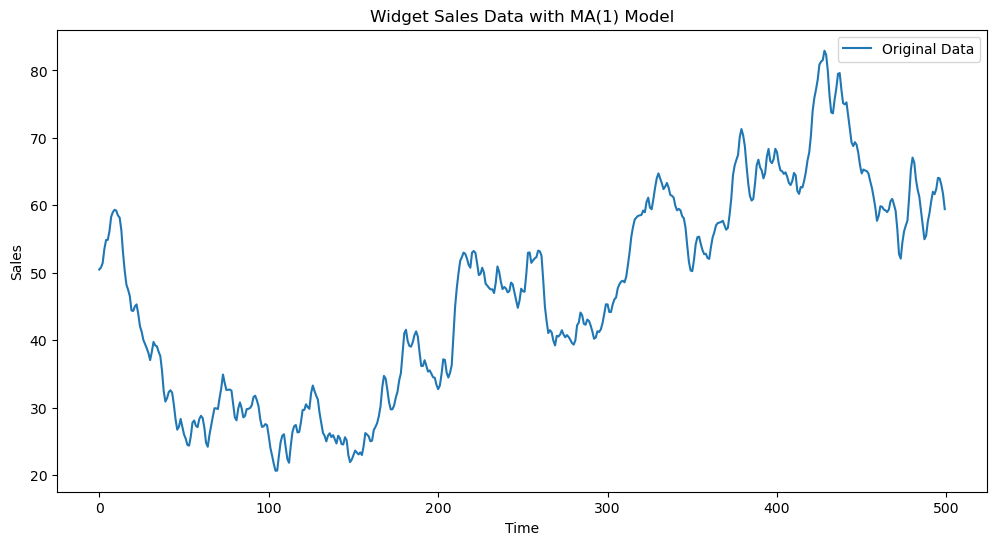

In [22]:
ma = np.convolve(data, np.ones(2)/2, mode='valid')
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.legend()
plt.title('Widget Sales Data with MA(1) Model')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

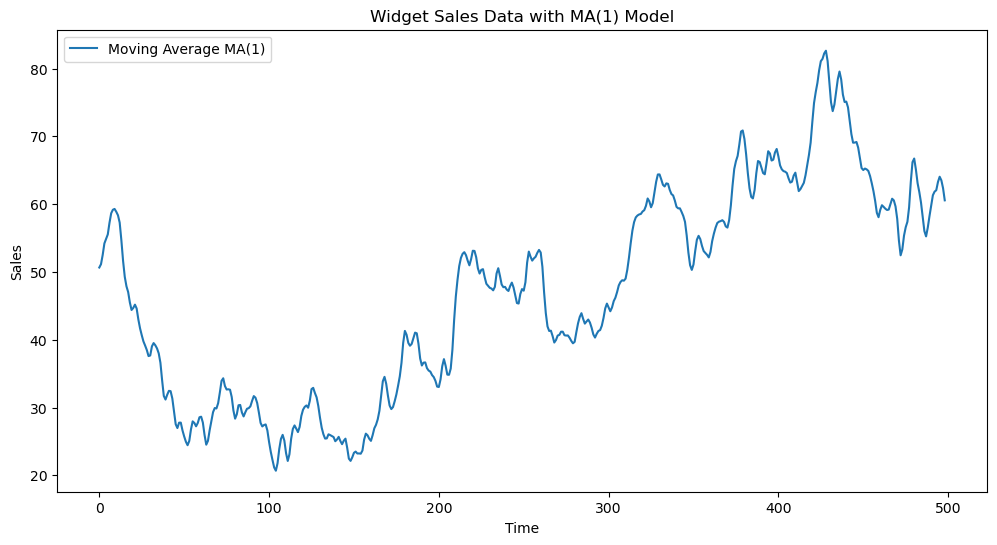

In [23]:
ma = np.convolve(data, np.ones(2)/2, mode='valid')
plt.figure(figsize=(12, 6))
plt.plot(ma, label='Moving Average MA(1)')
plt.legend()
plt.title('Widget Sales Data with MA(1) Model')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

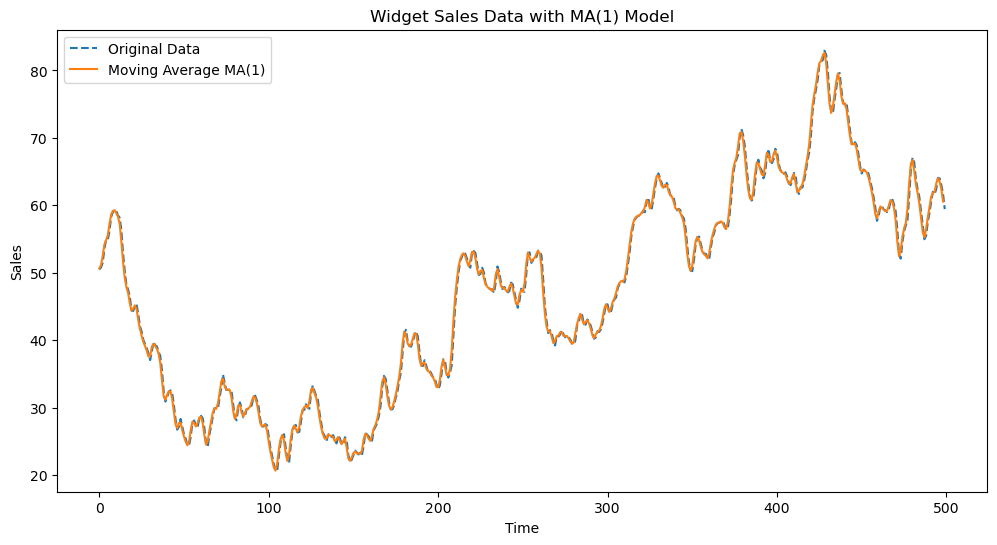

In [24]:
ma = np.convolve(data, np.ones(2)/2, mode='valid')
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data',linestyle = 'dashed')
plt.plot(ma, label='Moving Average MA(1)')
plt.legend()
plt.title('Widget Sales Data with MA(1) Model')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

# 2. Create a Moving Average model from data with first differencing

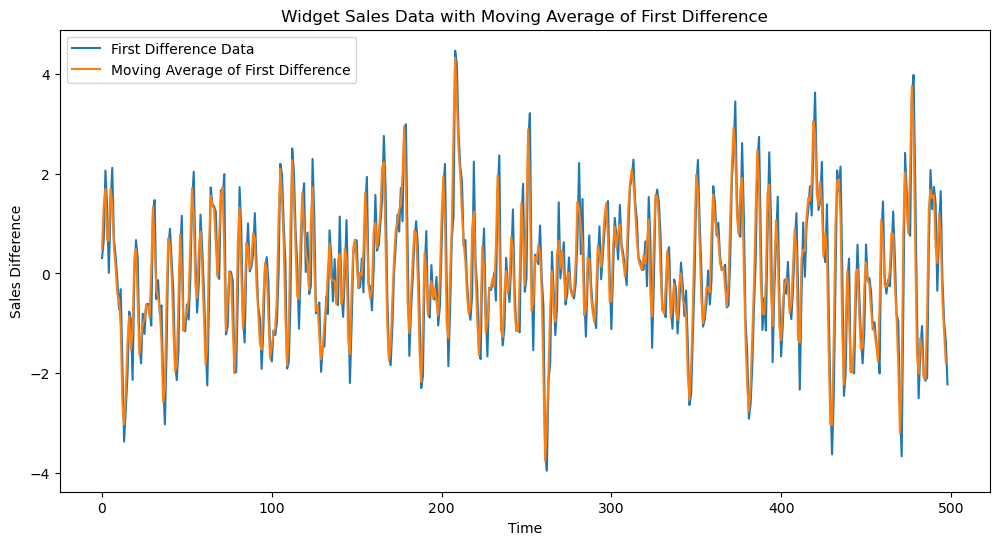

In [7]:
# Calculate the first difference
diff_data = np.diff(data)

# Calculate the moving average of the first difference
ma_diff = np.convolve(diff_data, np.ones(2)/2, mode='valid')

# Plot the first difference data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(diff_data, label='First Difference Data')
plt.plot(ma_diff, label='Moving Average of First Difference')
plt.legend()
plt.title('Widget Sales Data with Moving Average of First Difference')
plt.xlabel('Time')
plt.ylabel('Sales Difference')
plt.show()

# 3. **Create a Moving Average model with significant lags from its ACF plot**

In [13]:
def calculate_acf(data, max_lag):
    acf_values = [np.corrcoef(data[:-lag], data[lag:])[0, 1] for lag in range(1, max_lag + 1)]
    return np.array(acf_values)

/var/folders/0s/lbgtgzdn1q3glxh5j70hf37c0000gn/T/ipykernel_74350/2188971216.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(1, max_lag + 1), acf_values, basefmt="b-", use_line_collection=True)


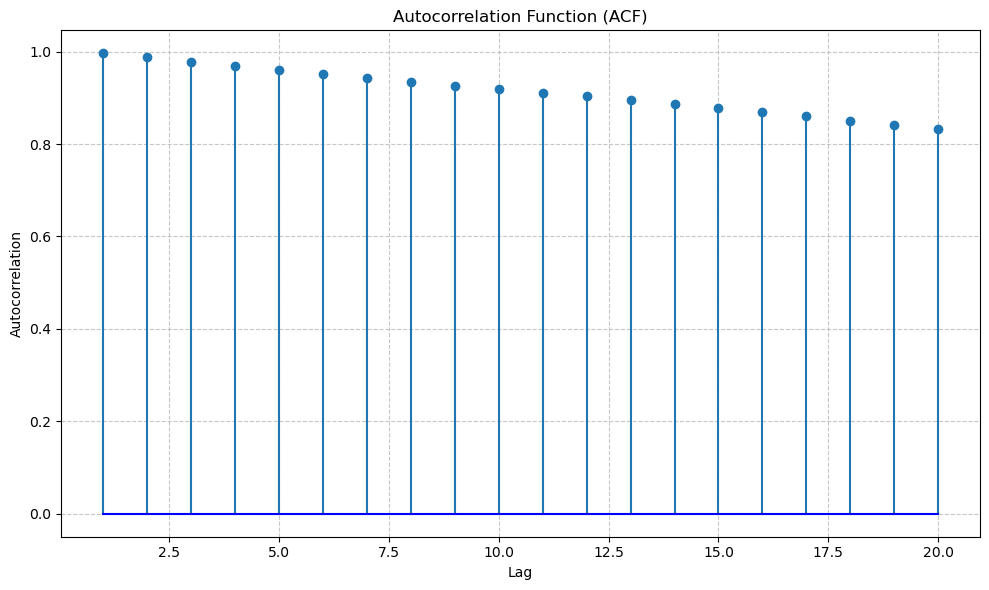

In [14]:
def plot_acf(data, max_lag):
    acf_values = calculate_acf(data, max_lag)

    # Plot the ACF
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(1, max_lag + 1), acf_values, basefmt="b-", use_line_collection=True)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage with your 'data' from before
url = 'https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/master/data/widget_sales.csv'
data = np.genfromtxt(url, delimiter=',', skip_header=1)

# Adjust this parameter as needed for the ACF plot
max_lag = 20
plot_acf(data, max_lag)


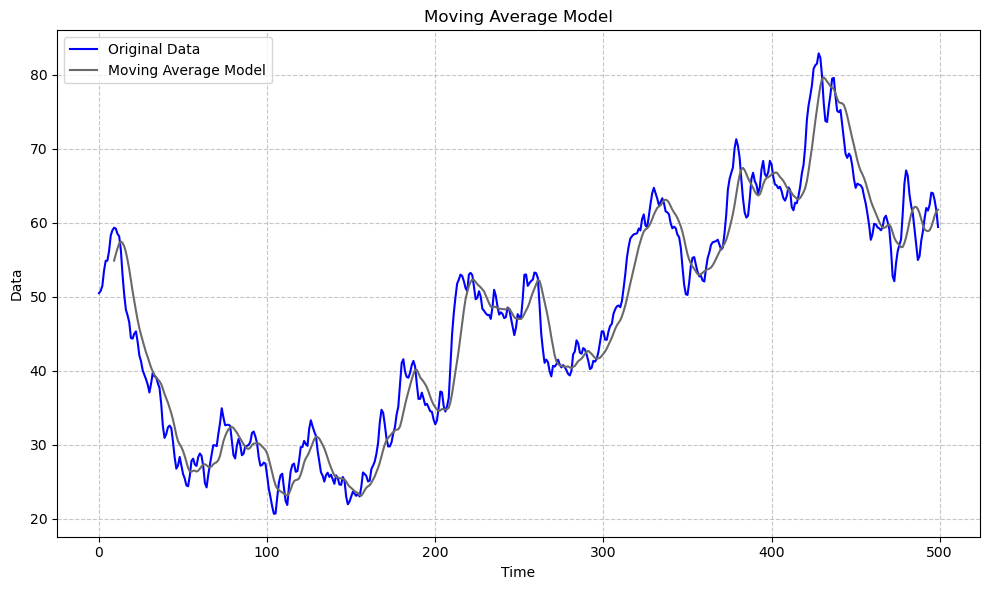

In [15]:
def plot_ma_model(data, window_size):
    ma_model = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

    
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original Data', color='blue')
    plt.plot(np.arange(window_size-1, len(data)), ma_model, label='Moving Average Model', color='dimgray')
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title('Moving Average Model')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Adjust this parameter as needed for the moving average model plot
window_size = 10
plot_ma_model(data, window_size)